In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import sympy as sp
import numpy as np
sp.init_printing()

In [2]:
x = sp.Symbol('x')
k = sp.Symbol('k', real = True, positive = True)
psi = sp.Function('psi')
x, k, psi

(x, k, psi)

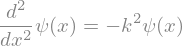

In [7]:
eq = sp.Eq(psi(x).diff(x, x), -k**2*psi(x))
eq

In [16]:
sol = sp.dsolve(eq, psi(x))
sol

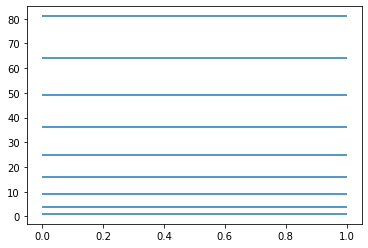

In [10]:
plt.hlines([n**2 for n in range(1, 10)], 0, 1)

$$\int_0^a \sin^2\frac{n \pi}{a}x$$

In [3]:
n = sp.Symbol('n', integer = True, positive = True)
a = sp.Symbol('a', real = True)
x = sp.Symbol('x')
h = sp.Symbol('hbar')
n, a, x, h

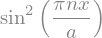

In [13]:
f = sp.sin(n * sp.pi * x / a)**2
f

In [14]:
sp.integrate(f, (x, 0, a))

In [19]:
xxx = np.linspace(0, 1, 10)
xxx

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [20]:
np.sin(xxx)

array([0.        , 0.11088263, 0.22039774, 0.3271947 , 0.42995636,
       0.52741539, 0.6183698 , 0.70169788, 0.77637192, 0.84147098])

In [17]:
def Psi(n, x, t, a = 1.0, h = 1.0, m = 1.0):
    return np.sqrt(2.0 / a) * np.sin(n * np.pi * x / a) * np.exp(-1j * n**2 * np.pi**2 * h / (2 * m * a**2) * t)

In [29]:
xs = np.linspace(0, 1, 100)
fig = plt.figure()
ax = plt.axes(xlim = (0, 1), ylim = (-1.5, 1.5))
line1, = ax.plot([], [], lw = 2)
line2, = ax.plot([], [], lw = 2)
dt = 0.0001
n = 10
plt.close()

#ffmpeg

def animate(i):
    line1.set_data(xs, np.real(Psi(n, xs, dt * i)))
    line2.set_data(xs, np.imag(Psi(n, xs, dt * i)))
    return line1, line2

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())

In [50]:
fig = plt.figure()
ax = plt.axes(xlim = (0, 1), ylim = (0, 2))
line1, = ax.plot([], [], lw = 2)
dt = 0.0001
n = 10
plt.close()

def animate(i):
    line1.set_data(xs, np.abs(Psi(n, xs, dt * i))**2)
    return line1, 

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())

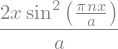

In [33]:
f = x * sp.sin(n * sp.pi * x / a)**2 * 2 / a
f

In [35]:
sp.integrate(f, (x, 0, a)).simplify()

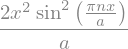

In [36]:
f = x**2 * sp.sin(n * sp.pi * x / a)**2 * 2 / a
f

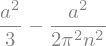

In [39]:
sp.integrate(f, (x, 0, a)).simplify()

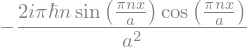

In [45]:
f = -sp.I * h * sp.sin(n * sp.pi * x / a) * 2 / a * sp.sin(n * sp.pi * x / a).diff(x)
f

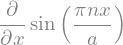

In [44]:
sp.Derivative(sp.sin(n * sp.pi * x / a), x)

In [46]:
sp.integrate(f, (x, 0, a)).simplify()

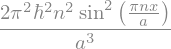

In [47]:
f = -h**2 * sp.sin(n * sp.pi * x / a) * 2 / a * sp.sin(n * sp.pi * x / a).diff(x, x)
f

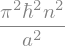

In [48]:
sp.integrate(f, (x, 0, a)).simplify()

$$(\psi_n, \psi_m)=\int_0^a \sqrt{\frac{2}{a}}\sin\frac{n \pi}{a}x\sqrt{\frac{2}{a}}\sin\frac{m \pi}{a}x\ dx$$

In [4]:
m = sp.Symbol('m', integer = True, positive = True)

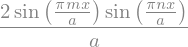

In [5]:
f = sp.sin(n * sp.pi * x / a) * 2 / a * sp.sin(m * sp.pi * x / a)
f

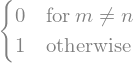

In [6]:
sp.integrate(f, (x, 0, a))

In [11]:
def fun(x, y, z):
    print(x, y, z)

In [9]:
l = [1, 2, 3]

In [12]:
fun(l[0], l[1], l[2])

1 2 3


In [13]:
fun(*l)

1 2 3


In [14]:
# {1:1, 2:1, 3:2}
def PsiSum(x, t, cn):
    ys = np.zeros_like(x, dtype = np.complex128)
    norm = np.sqrt(np.sum(np.array([*cn.values()])**2))
    for k, v in cn.items():
        ys += v * Psi(k, x, t) / norm
    return ys

In [21]:
xs = np.linspace(0, 1, 100)
fig = plt.figure()
ax = plt.axes(xlim = (0, 1), ylim = (0, 6))
line1, = ax.plot([], [], lw = 2)
dt = 0.001
plt.close()

def animate(i):
    line1.set_data(xs, np.abs(PsiSum(xs, dt * i, {1:1, 2:1, 3:1, 4:1, 5:1, 6:1}))**2)
    return line1, 

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())